# Importo il dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\Dennis\Desktop\scuola\archive\Pokemon.csv")
print (df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

# Controllo il dataset per NaN

In [14]:
righedatimancanti=df[df.isnull().any(axis=1)]#any(axis=1) è True se almeno un valore nella riga è mancante (None o NaN)
totaledatimancanti=righedatimancanti.shape[0]#fornisce il numero di righe nel DataFrame
print("Le righe con i dati mancanti sono: ")
print(righedatimancanti)
print(f"Il totale dei dati mancanti è: {totaledatimancanti}")

Le righe con i dati mancanti sono: 
       #        Name  Type 1 Type 2  Total   HP  Attack  Defense  Sp. Atk  \
4      4  Charmander    Fire    NaN    309   39      52       43       60   
5      5  Charmeleon    Fire    NaN    405   58      64       58       80   
9      7    Squirtle   Water    NaN    314   44      48       65       50   
10     8   Wartortle   Water    NaN    405   59      63       80       65   
11     9   Blastoise   Water    NaN    530   79      83      100       85   
..   ...         ...     ...    ...    ...  ...     ...      ...      ...   
775  705     Sliggoo  Dragon    NaN    452   68      75       53       83   
776  706      Goodra  Dragon    NaN    600   90     100       70      110   
788  712    Bergmite     Ice    NaN    304   55      69       85       32   
789  713     Avalugg     Ice    NaN    514   95     117      184       44   
792  716     Xerneas   Fairy    NaN    680  126     131       95      131   

     Sp. Def  Speed  Generation  Legend

In [15]:
totaledatimancanti=righedatimancanti.shape[0]#shape 0 è il numero di righe, 1 mi da il numero di colonne
colonnedatimancanti=df.isnull().any(axis=0)#any(axis=0)' è True se almeno un valore nella colonna è mancante (None o NaN)
print("Colonne con dati mancanti:")
print(colonnedatimancanti)
print(f"Totale dei dati mancanti: {totaledatimancanti}")

Colonne con dati mancanti:
#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool
Totale dei dati mancanti: 386


In [21]:
datimancanti=df.isnull()
print("I valori mancanti per ciascuna colonna sono:")
print(datimancanti)
#Gestione dei valori mancanti
datimancanti=df.isnull().sum()#sum fa il conteggio
print("I valori mancanti per ciascuna colonna sono:")
print(datimancanti)

I valori mancanti per ciascuna colonna sono:
         #   Name  Type 1  Type 2  Total     HP  Attack  Defense  Sp. Atk  \
0    False  False   False   False  False  False   False    False    False   
1    False  False   False   False  False  False   False    False    False   
2    False  False   False   False  False  False   False    False    False   
3    False  False   False   False  False  False   False    False    False   
4    False  False   False    True  False  False   False    False    False   
..     ...    ...     ...     ...    ...    ...     ...      ...      ...   
795  False  False   False   False  False  False   False    False    False   
796  False  False   False   False  False  False   False    False    False   
797  False  False   False   False  False  False   False    False    False   
798  False  False   False   False  False  False   False    False    False   
799  False  False   False   False  False  False   False    False    False   

     Sp. Def  Speed  Generatio

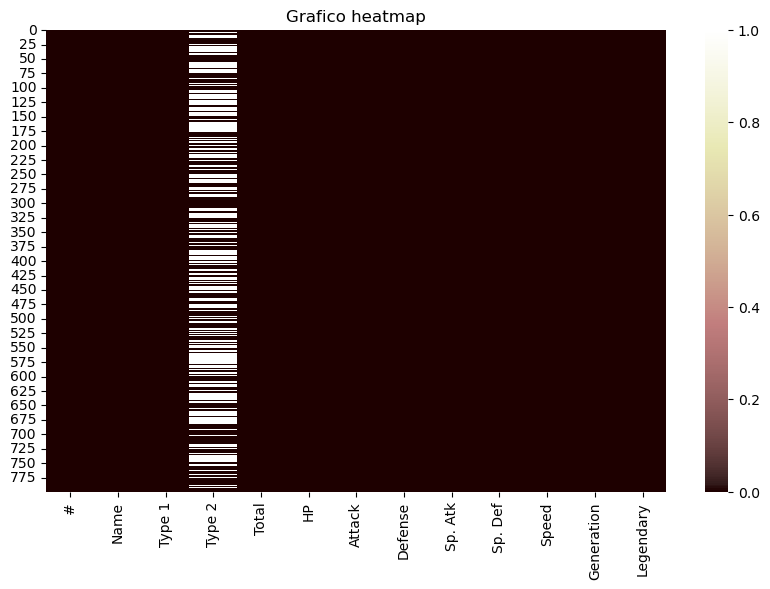

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap="pink")
plt.title("Grafico heatmap")
plt.show()

# Sostituisco i NaN

In [16]:
df1=pd.DataFrame()
#Seleziona le colonne numeriche e riempi i valori NaN con la media
colonnenumeriche=df.select_dtypes(include=['number'])#con include ci si include tutto quello che è numero
df1[colonnenumeriche.columns]=colonnenumeriche.fillna(colonnenumeriche.mean())
#Seleziona le colonne categoriche e riempi i valori NaN con None perchè un pokemon può non avere un secondo tipo 
colonnecategoriche=df.select_dtypes(include=['object'])
df1[colonnecategoriche.columns]=colonnecategoriche.fillna('None')
print(f"Questo è il primo con i valori mancanti: \n{df}\nQuesto invece è il secondo con i missing values sostituiti:\n{df1}\n")

Questo è il primo con i valori mancanti: 
       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120  

In [18]:
df1

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Name,Type 1,Type 2
0,1,318,45,49,49,65,65,45,1,Bulbasaur,Grass,Poison
1,2,405,60,62,63,80,80,60,1,Ivysaur,Grass,Poison
2,3,525,80,82,83,100,100,80,1,Venusaur,Grass,Poison
3,3,625,80,100,123,122,120,80,1,VenusaurMega Venusaur,Grass,Poison
4,4,309,39,52,43,60,50,65,1,Charmander,Fire,None
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,Diancie,Rock,Fairy
796,719,700,50,160,110,160,110,110,6,DiancieMega Diancie,Rock,Fairy
797,720,600,80,110,60,150,130,70,6,HoopaHoopa Confined,Psychic,Ghost
798,720,680,80,160,60,170,130,80,6,HoopaHoopa Unbound,Psychic,Dark


# Missing values

In [19]:
import pandas as pd
#Dataset con dati mancanti rappresentati da None o NaN (not a number)
dataset=[
    {"Età": 25, "Punteggio": 90, "Ammesso": 1},
    {"Età": None, "Punteggio": 85, "Ammesso": 0},
    {"Età": 28, "Punteggio": None, "Ammesso": 1},
    {"Età": None, "Punteggio": 75, "Ammesso": 1},
    {"Età": 23, "Punteggio": None, "Ammesso": None},
    {"Età": 23, "Punteggio": 77, "Ammesso": None},
]
df=pd.DataFrame(dataset)
righedatimancanti=df[df.isnull().any(axis=1)]#any(axis=1) è True se almeno un valore nella riga è mancante (None o NaN)
totaledatimancanti=righedatimancanti.shape[0]#fornisce il numero di righe nel DataFrame
print("Le righe con i dati mancanti sono: ")
print(righedatimancanti)
print(f"Il totale dei dati mancanti è: {totaledatimancanti}")

Le righe con i dati mancanti sono: 
    Età  Punteggio  Ammesso
1   NaN       85.0      0.0
2  28.0        NaN      1.0
3   NaN       75.0      1.0
4  23.0        NaN      NaN
5  23.0       77.0      NaN
Il totale dei dati mancanti è: 5


# Trovo gli outliers

In [25]:
mean_value = df1['#'].mean()
std_dev = df1['#'].std()

# Identifica gli outliers considerando ±3 sigma dalla media
outliers = df1[(df1['#'] > mean_value + 3 * std_dev) | (df1['#'] < mean_value - 3 * std_dev)]

mean_value = df1['Total'].mean()
std_dev = df1['Total'].std()
outliers = df1[(df1['Total'] > mean_value + 3 * std_dev) | (df1['Total'] < mean_value - 3 * std_dev)]

mean_value = df1['HP'].mean()
std_dev = df1['HP'].std()
outliers = df1[(df1['HP'] > mean_value + 3 * std_dev) | (df1['HP'] < mean_value - 3 * std_dev)]

mean_value = df1['Attack'].mean()
std_dev = df1['Attack'].std()
outliers = df1[(df1['Attack'] > mean_value + 3 * std_dev) | (df1['Attack'] < mean_value - 3 * std_dev)]

mean_value = df1['Defense'].mean()
std_dev = df1['Defense'].std()
outliers = df1[(df1['Defense'] > mean_value + 3 * std_dev) | (df1['Defense'] < mean_value - 3 * std_dev)]

mean_value = df1['Sp. Atk'].mean()
std_dev = df1['Sp. Atk'].std()
outliers = df1[(df1['Sp. Atk'] > mean_value + 3 * std_dev) | (df1['Sp. Atk'] < mean_value - 3 * std_dev)]

mean_value = df1['Sp. Def'].mean()
std_dev = df1['Sp. Def'].std()
outliers = df1[(df1['Sp. Def'] > mean_value + 3 * std_dev) | (df1['Sp. Def'] < mean_value - 3 * std_dev)]

mean_value = df1['Speed'].mean()
std_dev = df1['Speed'].std()
outliers = df1[(df1['Speed'] > mean_value + 3 * std_dev) | (df1['Speed'] < mean_value - 3 * std_dev)]

mean_value = df1['Generation'].mean()
std_dev = df1['Generation'].std()
outliers = df1[(df1['Generation'] > mean_value + 3 * std_dev) | (df1['Generation'] < mean_value - 3 * std_dev)]

outliers

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Name,Type 1,Type 2


# Splitting dataset

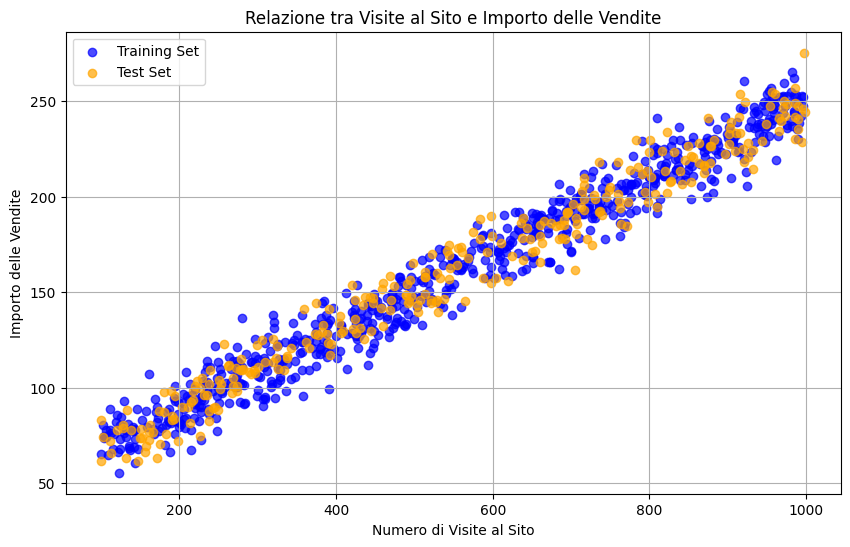

Dimensioni del Training Set (visite al sito e importo delle vendite): (700,) (700,)
Dimensioni del Test Set (visite al sito e importo delle vendite): (300,) (300,)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Creazione di dati casuali per visite al sito web e importo delle vendite
# Creare dati casuali per le visite al sito: variabile indipendente = input (cioè quello che serve per fare delle previsioni) e sono le Feature nel DataSet 
# L'importo delle vendite sono la variabile dipendente = output o target (cioè ciò che bisogna prevedere) del DataSet
np.random.seed(0)
visite_al_sito = np.random.randint(100, 1000, 1000) # la variabile "visite al sito" è indipendente, cioè non ha una formula in cui viene denominata un'altra variabile. "np.random.randint(100, 1000, 1000)" vuol dire che vengono creati dei valori randomici, sempre attraverso la libreria numpy. Si legge: il primo parametro (100) indica il valore minimo che può assumere il numero mentre il secondo parametro (1000) indica il valore massimo, infine il terzo parametro (1000) indica il numero di valori da generare
importo_vendite = 50 + 0.2 * visite_al_sito + np.random.normal(0, 10, 1000) # la variabile "importo delle vendite" è dipendente, cioè ha una formula in cui viene denominata un'altra variabile
# Suddivisione del dataset in training set (70%) e test set (30%)
X_train, X_test, y_train, y_test = train_test_split(visite_al_sito, importo_vendite, test_size=0.3, random_state=42) # riprendendo la formula di prima: le X sono i valori delle visite al sito perchè sono le Feature del DataSet, cioè l'input. Invece le Y sono gli output o target del DataSet, cioè i valori degli importi vendite. "test_size=0.3" vuol dire che il DataSet di Test è il 30% di quello totale mentre random_state sceglie in modo randomico i valori del DataSet per il Training e il Test

# Previsione del modello: dal valore delle visite al sito prevedere l'importo vendite

# Creazione di un grafico a dispersione
plt.figure(figsize=(10, 6)) # dimensione del grafico
plt.scatter(X_train, y_train, label='Training Set', color='blue', alpha=0.7) # label è il nome della legenda, alpha è il valore della trasparenza: più è vicino ad 0 come valore i pallini del grafico saranno più trasparenti
plt.scatter(X_test, y_test, label='Test Set', color='orange', alpha=0.7)
plt.xlabel('Numero di Visite al Sito')
plt.ylabel('Importo delle Vendite')
plt.title('Relazione tra Visite al Sito e Importo delle Vendite')
plt.legend()
plt.grid(True)
plt.show()
# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (visite al sito e importo delle vendite):", X_train.shape, y_train.shape)
print("Dimensioni del Test Set (visite al sito e importo delle vendite):", X_test.shape, y_test.shape)

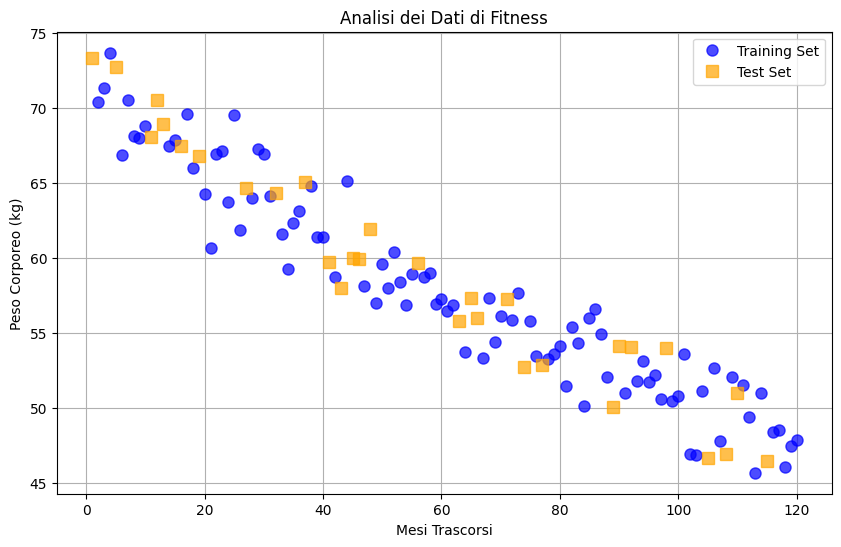

Dimensioni del Training Set (mesi trascorsi e peso corporeo): (90,) (90,)
Dimensioni del Test Set (mesi trascorsi e peso corporeo): (30,) (30,)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Creazione di dati casuali per mesi trascorsi e peso corporeo
# Creare dati casuali per i mesi trascorsi: variabile indipendente = input (cioè quello che serve per fare delle previsioni) e sono le Feature nel DataSet 
# Il peso corporeo è la variabile dipendente = output o target (cioè ciò che bisogna prevedere) del DataSet
np.random.seed(0)
n=120 # è un parametro, non è una variabile ed è molto comodo in quanto se si cambia quello si cambia tutto ciò "collegato" ad esso
mesi_trascorsi = np.arange(1, n+1) # la variabile "visite al sito" è indipendente, cioè non ha una formula in cui viene denominata un'altra variabile. "np.arange(1, n+1)" serve per generare un array di numeri interi da 1 a n, inclusi, che rappresentano i singoli mesi nel periodo di osservazione.
peso_corporeo = 70 - 0.2 * mesi_trascorsi + np.random.normal(0, 2, n)

# Suddivisione del dataset in training set (75%) e test set (25%)
X_train, X_test, y_train, y_test = train_test_split(mesi_trascorsi, peso_corporeo, test_size=0.25, random_state=42) # riprendendo la formula di prima: le X sono i valori dei mesi trascorsi perchè sono le Feature del DataSet, cioè l'input. Invece le Y sono gli output o target del DataSet, cioè i valori del peso corporeo. "test_size=0.25" vuol dire che il DataSet di Test è il 25% di quello totale mentre random_state sceglie in modo randomico i valori del DataSet per il Training e il Test

# Creazione di un grafico a linee
plt.figure(figsize=(10, 6)) #dimesioni del grafico
plt.plot(X_train, y_train, label='Training Set', marker='o', color='blue', linestyle='', markersize=8,alpha=0.7) # label è il nome della legenda, alpha è il valore della trasparenza: più è vicino ad 0 come valore i pallini del grafico saranno più trasparenti
plt.plot(X_test, y_test, label='Test Set', marker='s', color='orange', linestyle='', markersize=8,alpha=0.7)
plt.xlabel('Mesi Trascorsi')
plt.ylabel('Peso Corporeo (kg)')
plt.title('Analisi dei Dati di Fitness')
plt.legend()
plt.grid(True)
plt.show()

# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (mesi trascorsi e peso corporeo):", X_train.shape, y_train.shape)
print("Dimensioni del Test Set (mesi trascorsi e peso corporeo):", X_test.shape, y_test.shape)

# Scaling

In [27]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(3)
# Supponiamo di avere un dataset con feature (input) X e target (output) y
X = np.random.rand(100, 2) # crea dati del dataset (100 campioni, 2 feature)
y = np.random.choice(['A', 'B'], size=100) # etichette (stringhe A e B) di classi casuali (categorie), size indica la grandezza di y (cioè ha 100 valori)
# Per mostrare che i valori siano casuali, essi vengono stampati 
print("I valori di x sono:")
print(X)
print("I valori di y sono:")
print(y)

# Calcolare le percentuali delle classi nell'intero dataset originale
percentuale_classe_A = sum(y == 'A') / len(y)*100 # nel primo caso la percentuale viene calcolata dividendo il numero dei valori di A per la lunghezza di y
percentuale_classe_B = 100 - percentuale_classe_A # nel secondo per calcolare la percentuale mancante si sottrae a 100 il valore della percentuale classe A

# Eseguire uno split stratificato con una proporzione specificata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # "test_size=0.3" vuol dire che il DataSet di Test è il 30% di quello totale mentre random_state sceglie in modo randomico i valori del DataSet per il Training e il Test

# Calcolare le percentuali delle classi nel training set e nel test set
percentuale_classe_A_train = sum(y_train == 'A') / len(y_train)*100
percentuale_classe_B_train = 100 - percentuale_classe_A_train

percentuale_classe_A_test = sum(y_test == 'A') / len(y_test)*100
percentuale_classe_B_test = 100 - percentuale_classe_A_test

# Stampare delle proporzioni
print("Percentuale Classe A nel Data Set:", percentuale_classe_A)
print("Percentuale Classe B nel Data Set:", percentuale_classe_B)
print("Percentuale Classe A nel Training Set:", percentuale_classe_A_train)
print("Percentuale Classe B nel Training Set:", percentuale_classe_B_train)
print("Percentuale Classe A nel Test Set:", percentuale_classe_A_test)
print("Percentuale Classe B nel Test Set:", percentuale_classe_B_test)

I valori di x sono:
[[0.5507979  0.70814782]
 [0.29090474 0.51082761]
 [0.89294695 0.89629309]
 [0.12558531 0.20724288]
 [0.0514672  0.44080984]
 [0.02987621 0.45683322]
 [0.64914405 0.27848728]
 [0.6762549  0.59086282]
 [0.02398188 0.55885409]
 [0.25925245 0.4151012 ]
 [0.28352508 0.69313792]
 [0.44045372 0.15686774]
 [0.54464902 0.78031476]
 [0.30636353 0.22195788]
 [0.38797126 0.93638365]
 [0.97599542 0.67238368]
 [0.90283411 0.84575087]
 [0.37799404 0.09221701]
 [0.6534109  0.55784076]
 [0.36156476 0.2250545 ]
 [0.40651992 0.46894025]
 [0.26923558 0.29179277]
 [0.4576864  0.86053391]
 [0.5862529  0.28348786]
 [0.27797751 0.45462208]
 [0.20541034 0.20137871]
 [0.51403506 0.08722937]
 [0.48358553 0.36217621]
 [0.70768662 0.74674622]
 [0.69109292 0.68918041]
 [0.37360012 0.6681348 ]
 [0.33984866 0.57279387]
 [0.32580716 0.44514505]
 [0.06152893 0.24267542]
 [0.97160261 0.2305842 ]
 [0.69147751 0.65047686]
 [0.72393914 0.47508861]
 [0.59666377 0.06696942]
 [0.07256214 0.19897603]
 [0.1

# Outliers


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio
data = {'Valori': [1, 2, 3, 4, 5, 10, 15, 20, 25, 300, 1000, 100000000, -50000000, -50]}
df = pd.DataFrame(data)
# Lista con outliers da entrambi i lati

# Calcola la media e la deviazione standard
mean_value = df['Valori'].mean()
std_dev = df['Valori'].std()
std_dev

30786384.39895254

In [24]:
#Identifica gli outliers consiederando +3 sigma dalla media
outliers=df[(df["Valori"]>mean_value+3*std_dev) | (df["Valori"]<mean_value-3*std_dev)]
outliers

,Valori
11,100000000


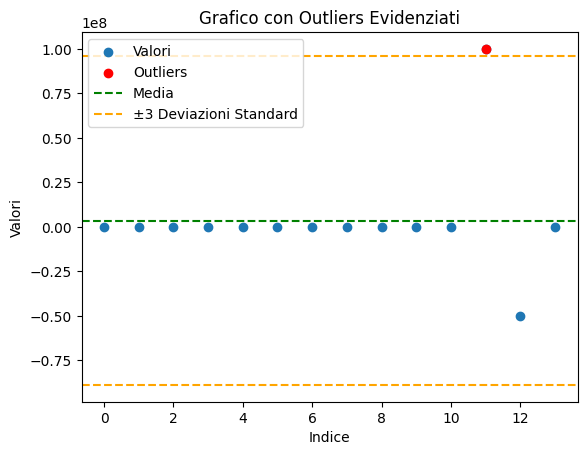

In [25]:
# Crea un grafico a dispersione
plt.scatter(df.index, df['Valori'], label='Valori')

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers['Valori'], color='red', label='Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value - 3 * std_dev, color='orange', linestyle='--')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostra il grafico
plt.show()